In [1]:
%matplotlib inline
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib.cm
from fermipy.spectrum import PLExpCutoff
from haloanalysis.model import make_prim_model, make_casc_model
from haloanalysis.model import HaloModelMap
from haloanalysis.utils import Axis
import numpy as np

hmm = HaloModelMap.create_from_fits('results.fits')

axis_eobs = hmm.axes[1]

emin = axis_eobs.lo
emax = axis_eobs.hi
ectr = axis_eobs.centers
deltae = emax-emin
efct = ectr**2/deltae

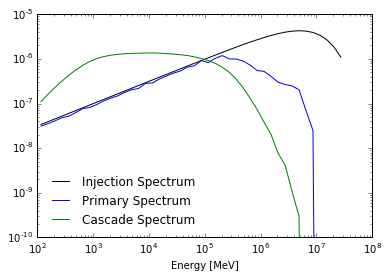

In [2]:
# Injection spectrum
inj_spec = PLExpCutoff([1E-13,-1.5,10E6],scale=1E3)

axis_eobs = Axis('eobs',np.linspace(2,6,33))

inj_flux = inj_spec.flux(emin,emax)
prim_flux = hmm.prim_flux(inj_spec,[0.0,-16.0])
casc_flux = hmm.casc_flux(inj_spec,[0.0,-16.0])

plt.figure()

plt.loglog(ectr,inj_flux*efct,label='Injection Spectrum',color='k')
plt.loglog(ectr,prim_flux*efct,label='Primary Spectrum',color='b')
plt.loglog(ectr,casc_flux*efct,label='Cascade Spectrum',color='g')

plt.gca().set_ylim(1E-10)
plt.gca().legend(frameon=False,loc='lower left')
plt.gca().set_xlabel('Energy [MeV]')


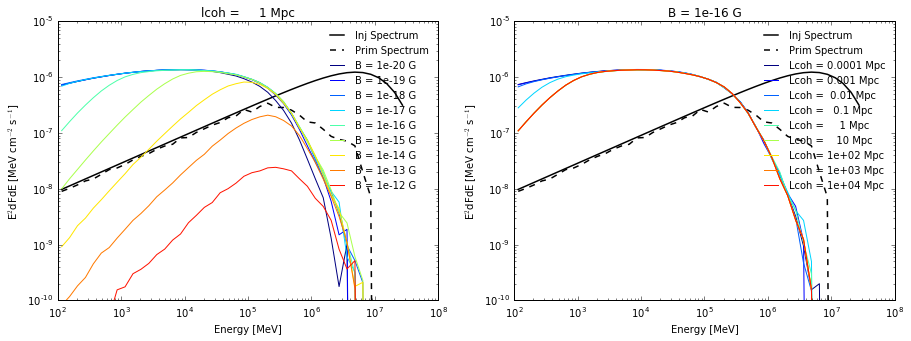

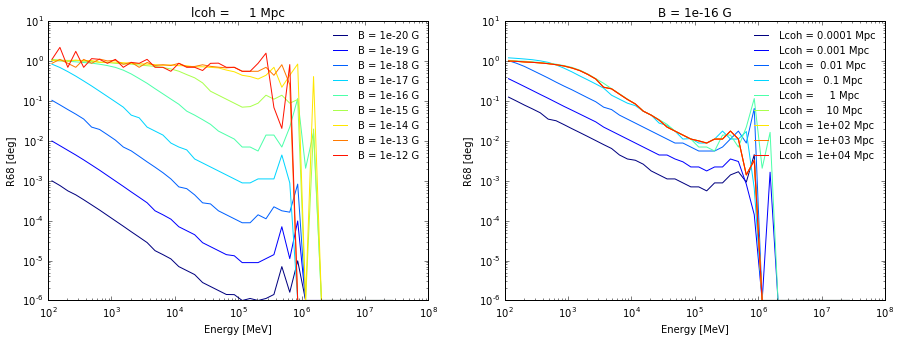

In [3]:
inj_spec = PLExpCutoff([1E-13,-1.5,10E6],scale=1E3)

nstep = 9
igmf_val = np.linspace(-20,-12,nstep)
lcoh_val = np.linspace(-4,4,nstep)

prim_flux = hmm.prim_flux(inj_spec,[0.0,-16.0])
inj_flux = inj_spec.flux(emin,emax)

# Cascade Flux at Constant Lcoh

casc_flux = hmm.casc_flux(inj_spec,[0.0,igmf_val])

fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)

plt.loglog(ectr,inj_flux*ectr,color='k',linewidth=1.5,label='Inj Spectrum')
plt.loglog(ectr,prim_flux*ectr,color='k',linewidth=1.5,linestyle='--',label='Prim Spectrum')

for i in range(casc_flux.shape[1]):

    plt.loglog(ectr,casc_flux[:,i]*efct,color=matplotlib.cm.jet(float(i)/float(nstep)),
               label='B = %5.2g G'%10**igmf_val[i])
    
plt.gca().set_ylim(1E-10)
plt.gca().set_title('lcoh = %5.2g Mpc'%1.0)
plt.gca().legend(frameon=False,loc='upper right',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('E$^{2}$dFdE [MeV cm$^{-2}$ s$^{-1}$]')

# Cascade Flux at Constant Bfield
fig.add_subplot(122)

casc_flux = hmm.casc_flux(inj_spec,[lcoh_val,-16.0])
               
plt.loglog(ectr,inj_flux*ectr,color='k',linewidth=1.5,label='Inj Spectrum')
plt.loglog(ectr,prim_flux*ectr,color='k',linewidth=1.5,linestyle='--',label='Prim Spectrum')

for i in range(casc_flux.shape[1]):

    plt.loglog(ectr,casc_flux[:,i]*efct,color=matplotlib.cm.jet(float(i)/float(nstep)),
               label='Lcoh = %5.2g Mpc'%10**lcoh_val[i])
    
plt.gca().set_ylim(1E-10)
plt.gca().set_title('B = %5.2g G'%10**-16.0)
plt.gca().legend(frameon=False,loc='upper right',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('E$^{2}$dFdE [MeV cm$^{-2}$ s$^{-1}$]')



# R68 at Constant Lcoh
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)

casc_r68 = hmm.casc_r68(inj_spec,[0.0,igmf_val])

for i in range(casc_r68.shape[1]):

    plt.loglog(ectr,casc_r68[:,i],color=matplotlib.cm.jet(float(i)/9.),
               label='B = %5.2g G'%10**igmf_val[i])
    
plt.gca().set_ylim(1E-6,10)
plt.gca().set_title('lcoh = %5.2g Mpc'%1.0)
plt.gca().legend(frameon=False,loc='best',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('R68 [deg]')

# R68 at Constant Bfield

casc_r68 = hmm.casc_r68(inj_spec,[lcoh_val,-16.0])

fig.add_subplot(122)
for i in range(casc_r68.shape[1]):

    plt.loglog(ectr,casc_r68[:,i],color=matplotlib.cm.jet(float(i)/9.),
               label='Lcoh = %5.2g Mpc'%10**lcoh_val[i])
    
plt.gca().set_ylim(1E-6,10)
plt.gca().set_title('B = %5.2g G'%10**-16.0)
plt.gca().legend(frameon=False,loc='upper right',prop={'size':10})
plt.gca().set_xlabel('Energy [MeV]')
plt.gca().set_ylabel('R68 [deg]')
    